In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import train and test dataset

train_df = pd.read_csv('/content/drive/MyDrive/Data/churn-bigml-80.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Data/churn-bigml-20.csv')

In [ ]:
# Concat the given dataset 
df = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
# Top 5 rows of dataset
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Number of columns

len(df.columns)

20

In [ ]:
# Shape of dataset(number of rows and columns) 
df.shape


(3333, 20)

# EDA

In [ ]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

From above we can see that there is no null values.

# Distribution of columns and outliers

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            101.064806
Area code                 437.182418
Number vmail messages       8.099010
Total day minutes         179.775098
Total day calls           100.435644
Total day charge           30.562307
Total eve minutes         200.980348
Total eve calls           100.114311
Total eve charge           17.083540
Total night minutes       200.872037
Total night calls         100.107711
Total night charge          9.039325
Total intl minutes         10.237294
Total intl calls            4.479448
Total intl charge           2.764581
Customer service calls      1.562856
Churn                       0.144914
dtype: float64

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Account length            101.00
Area code                 415.00
Number vmail messages       0.00
Total day minutes         179.40
Total day calls           101.00
Total day charge           30.50
Total eve minutes         201.40
Total eve calls           100.00
Total eve charge           17.12
Total night minutes       201.20
Total night calls         100.00
Total night charge          9.05
Total intl minutes         10.30
Total intl calls            4.00
Total intl charge           2.78
Customer service calls      1.00
Churn                       0.00
dtype: float64

In [ ]:
num_feature=[feature for feature in df.columns if df[feature].dtypes != 'O']

In [ ]:
num_feature

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Customer service calls')

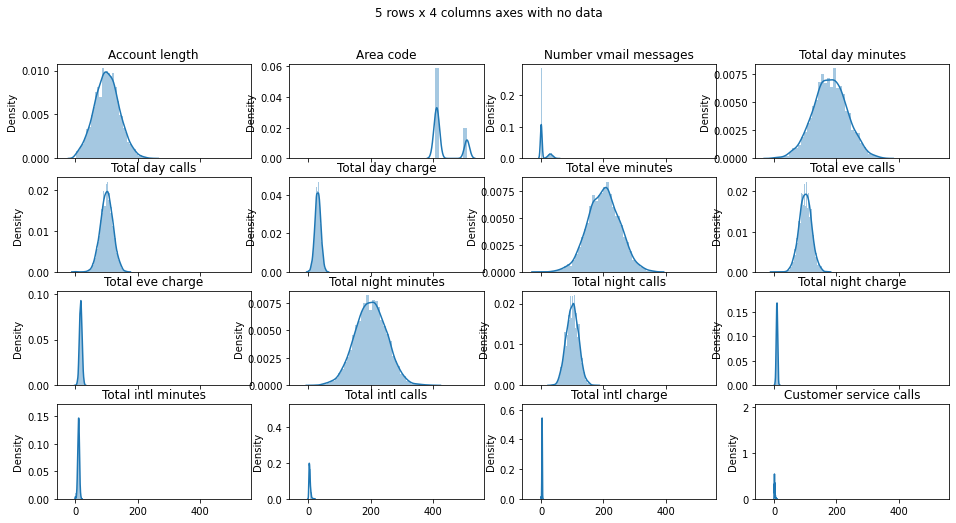

In [ ]:
fig, axes = plt.subplots(4,4, sharex=True, figsize=(16,8))
fig.suptitle('5 rows x 4 columns axes with no data')

sns.distplot(ax=axes[0,0], x=df[num_feature[0]])
axes[0,0].set_title(num_feature[0])
sns.distplot(ax=axes[0,1], x=df[num_feature[1]])
axes[0,1].set_title(num_feature[1])
sns.distplot(ax=axes[0,2], x=df[num_feature[2]])
axes[0,2].set_title(num_feature[2])
sns.distplot(ax=axes[0,3], x=df[num_feature[3]])
axes[0,3].set_title(num_feature[3])

sns.distplot(ax=axes[1,0], x=df[num_feature[4]])
axes[1,0].set_title(num_feature[4])
sns.distplot(ax=axes[1,1], x=df[num_feature[5]])
axes[1,1].set_title(num_feature[5])
sns.distplot(ax=axes[1,2], x=df[num_feature[6]])
axes[1,2].set_title(num_feature[6])
sns.distplot(ax=axes[1,3], x=df[num_feature[7]])
axes[1,3].set_title(num_feature[7])

sns.distplot(ax=axes[2,0], x=df[num_feature[8]])
axes[2,0].set_title(num_feature[8])
sns.distplot(ax=axes[2,1], x=df[num_feature[9]])
axes[2,1].set_title(num_feature[9])
sns.distplot(ax=axes[2,2], x=df[num_feature[10]])
axes[2,2].set_title(num_feature[10])
sns.distplot(ax=axes[2,3], x=df[num_feature[11]])
axes[2,3].set_title(num_feature[11])

sns.distplot(ax=axes[3,0], x=df[num_feature[12]])
axes[3,0].set_title(num_feature[12])
sns.distplot(ax=axes[3,1], x=df[num_feature[13]])
axes[3,1].set_title(num_feature[13])
sns.distplot(ax=axes[3,2], x=df[num_feature[14]])
axes[3,2].set_title(num_feature[14])
sns.distplot(ax=axes[3,3], x=df[num_feature[15]])
axes[3,3].set_title(num_feature[15])

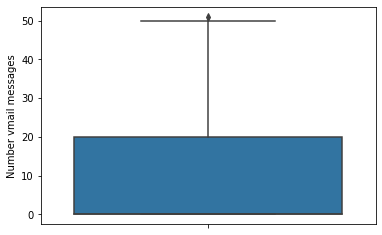

In [ ]:
sns.boxplot(data = df, y = 'Number vmail messages')

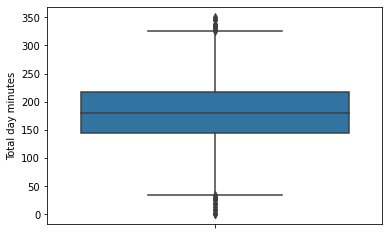

In [ ]:
sns.boxplot(data = df, y = 'Total day minutes')

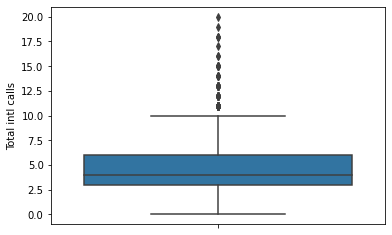

In [ ]:
sns.boxplot(data = df, y = 'Total intl calls')

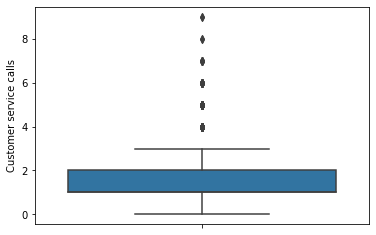

In [ ]:
sns.boxplot(data = df, y = 'Customer service calls')

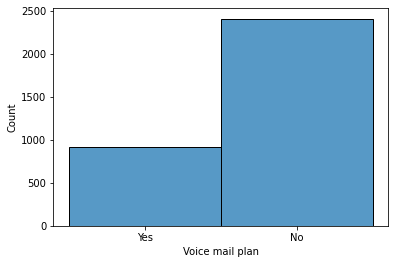

In [ ]:
sns.histplot(data = df, x='Voice mail plan')


In [ ]:
df[df['Voice mail plan']==1]['Churn'].value_counts()

Series([], Name: Churn, dtype: int64)

In [ ]:
df[df['Voice mail plan']==0]['Churn'].value_counts()

Series([], Name: Churn, dtype: int64)

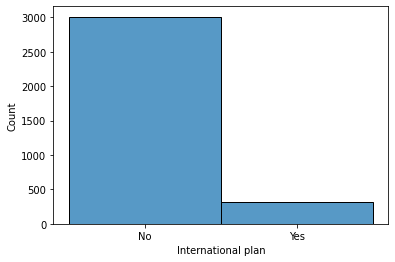

In [ ]:
sns.histplot(data = df, x='International plan')


In [ ]:
df[df['International plan']==1]['Churn'].value_counts()

Series([], Name: Churn, dtype: int64)

In [ ]:
df[df['International plan']==0]['Churn'].value_counts()

Series([], Name: Churn, dtype: int64)

The vast majority of customers are also not enrolled in an international phone nor a voicemail plan.

Of the majority of customers that did not have international plans, approx 11.5% of customers churned. However, of the customers that did have international plans, a much higher 42.5% of customers churned.


Customers who do not have voicemail plans, approx 16.7% are churning. In contrast, only 8.7% of customers with voicemails plans churn.

In [ ]:
df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [ ]:
df[df['Voice mail plan']=='No']['Churn'].value_counts()

False    2008
True      403
Name: Churn, dtype: int64

In [ ]:
df[df['Voice mail plan']=='Yes']['Churn'].value_counts()

False    842
True      80
Name: Churn, dtype: int64

Only 28% of customers were not enrolled in a voicemail plan. Those how have taken voicemail plan, has less chance of churning. Approximately 25% of people who have not bought voicemail plan will be churn.

In [ ]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# Total number of state
len(df['State'].unique())

51

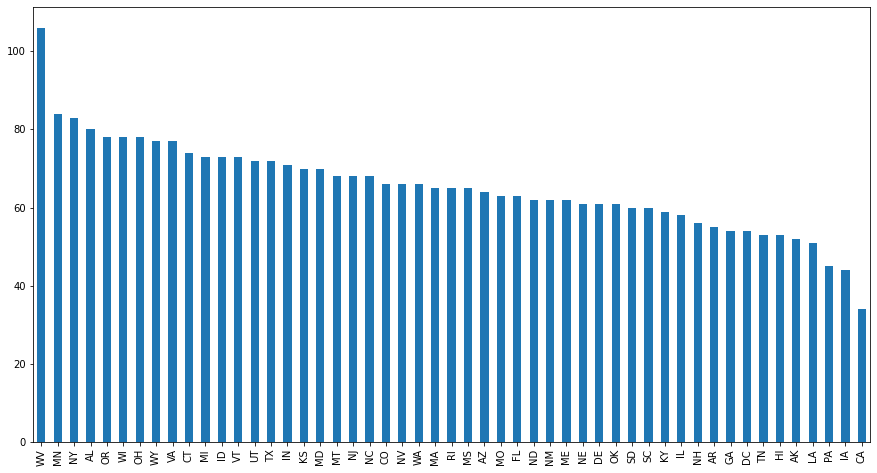

In [ ]:
# Plot the frequency of each state.
plt.figure(figsize=(15,8))
df['State'].value_counts().plot(kind='bar')

The highest proportion of customers are located in West Virginia(WV), with the lowest proportion of customers in the state of California(CA).

<Figure size 1080x2160 with 0 Axes>

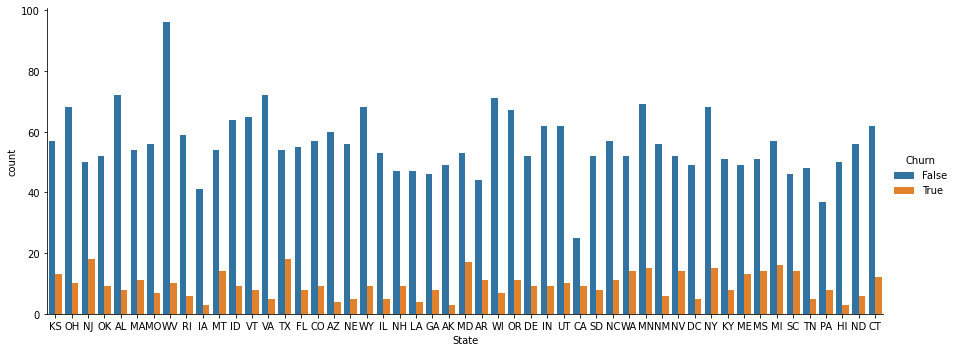

In [ ]:
# Plot shows churns for each state.
plt.figure(figsize=(15,30))
sns.catplot(x='State', hue='Churn', kind='count', data=df, aspect = 2.5)
plt.show()

When blue bar is high red bar is low,.i.e., when customer is high there will be less chances of churning.

In [ ]:
# Churns in the state having highest number of customer
df[df['State']=='WV']['Churn'].value_counts()

False    96
True     10
Name: Churn, dtype: int64

In [ ]:
# Churns in the state having lowest number of customer
df[df['State']=='CA']['Churn'].value_counts()

False    25
True      9
Name: Churn, dtype: int64

1. The proportion of customers churning across different states would be a more representative indicator of churn, because:

      1.a Churn rate is low(9.5%) in the state WV(highest customer) compare to state CA(26.5%)(lowest customer).

      1.b We determine that the highest churning state was New Jersey, while lowest churning state was Hawaii.


In [ ]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

Approximately 50% of customers have the are code 415, with approximately 25% with 408 and 25% with 510.

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

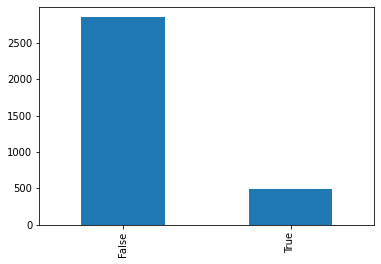

In [ ]:
#plt.figure(figsize=(15,8))
df['Churn'].value_counts().plot(kind='bar')

Approximately 15% of all customers churned. 

In [ ]:
# Account length vs Chruning rate
df[df['Account length']<=50]['Churn'].value_counts()

False    297
True      44
Name: Churn, dtype: int64

Having account length less than 50, implies less churn rate.

In [ ]:
df[(df['Account length']<=100) & (df['Account length']>=50)]['Churn'].value_counts()

False    1146
True      192
Name: Churn, dtype: int64

In [ ]:
df[df['Account length']>=150]['Churn'].value_counts()

False    311
True      56
Name: Churn, dtype: int64

Here it appear that there was a lslightly higher proportion of customers churning with highest account lengths.

In [ ]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

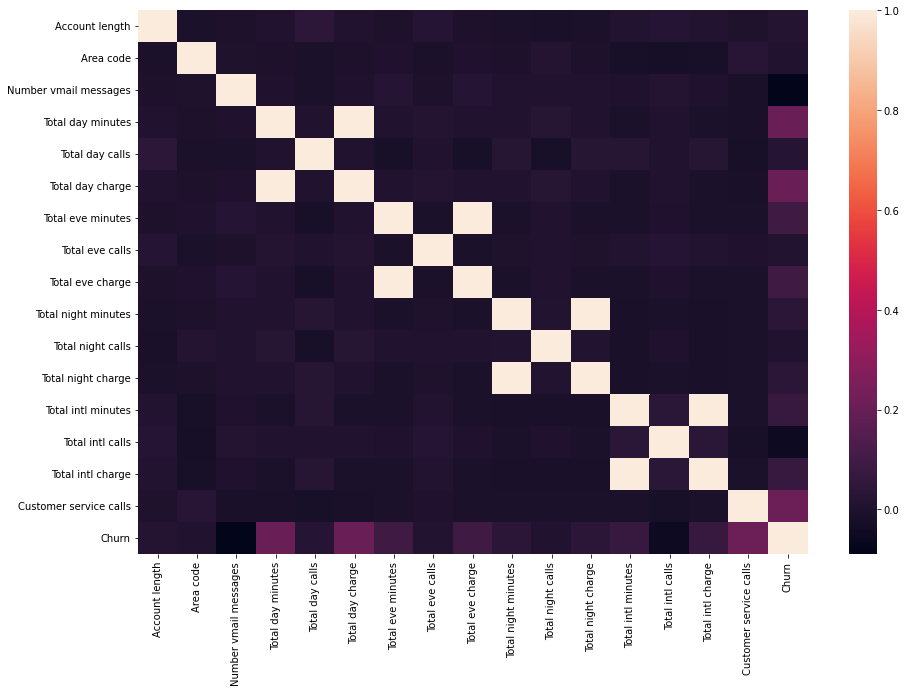

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches

sns.heatmap(df.corr(), ax=ax)
plt.show()

From above correlation heatmap, it is evident and intuitive patterns was linear correlation between the number of minutes called (regarless of time of day) and the amount the customer was charged.

When investigating the customer churn trends, it does appear that customers being charged more do tend to churn more.

In [ ]:
cat_feature = [feature for feature in df.columns if df[feature].dtype=='O']
cat_feature

['State', 'International plan', 'Voice mail plan']

In [ ]:
#convert categorical features in to numuerical fetures
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df['International plan'])
#list(le.classes_)
df['International plan'] = le.transform(df['International plan'])

In [ ]:
df['International plan'].value_counts()

0    3010
1     323
Name: International plan, dtype: int64

In [ ]:
le.fit(df['Voice mail plan'])
df['Voice mail plan'] = le.transform(df['Voice mail plan'])

In [ ]:
df['Voice mail plan'].value_counts()

0    2411
1     922
Name: Voice mail plan, dtype: int64

In [ ]:
df['Churn'] = df['Churn'].apply(lambda x: int(x))
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3329,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3330,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
3331,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [ ]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
# Drop the state column
df.drop('State', axis=1, inplace=True)
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0
3329,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0
3330,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0
3331,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0


In [ ]:
# Dependent and independent variable
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
feature = X.columns.tolist()

# Feature Scaling

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
  
# Scaled feature
X_scaled = min_max_scaler.fit_transform(X)

# Modeling using 4-fold CV

# Descision Tree

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
tree_model = DecisionTreeClassifier()

Fold: 1               precision    recall  f1-score   support

           0       0.96      0.93      0.94       734
           1       0.57      0.69      0.62       100

    accuracy                           0.90       834
   macro avg       0.76      0.81      0.78       834
weighted avg       0.91      0.90      0.90       834

confusion matrix [[682  52]
 [ 31  69]]


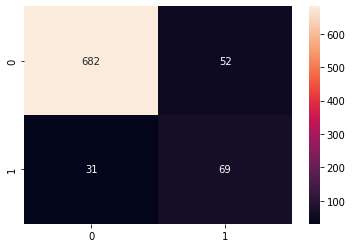

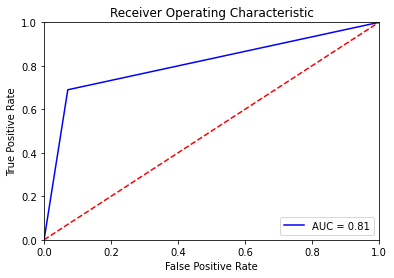

--------------------------------------------
Fold: 2               precision    recall  f1-score   support

           0       0.95      0.93      0.94       713
           1       0.64      0.69      0.66       120

    accuracy                           0.90       833
   macro avg       0.79      0.81      0.80       833
weighted avg       0.90      0.90      0.90       833

confusion matrix [[666  47]
 [ 37  83]]


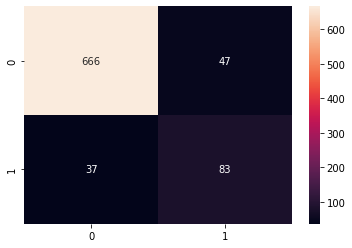

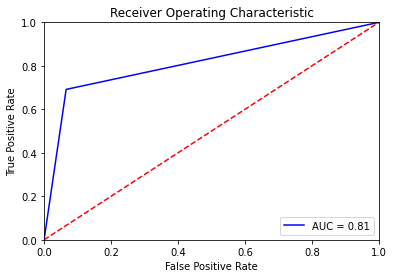

--------------------------------------------
Fold: 3               precision    recall  f1-score   support

           0       0.94      0.95      0.95       697
           1       0.74      0.69      0.71       136

    accuracy                           0.91       833
   macro avg       0.84      0.82      0.83       833
weighted avg       0.91      0.91      0.91       833

confusion matrix [[664  33]
 [ 42  94]]


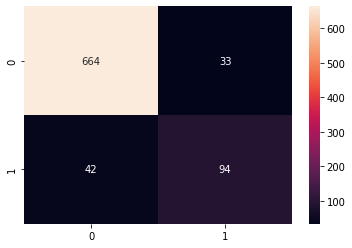

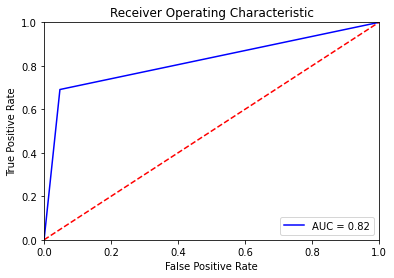

--------------------------------------------
Fold: 4               precision    recall  f1-score   support

           0       0.96      0.94      0.95       706
           1       0.70      0.76      0.72       127

    accuracy                           0.91       833
   macro avg       0.83      0.85      0.84       833
weighted avg       0.92      0.91      0.91       833

confusion matrix [[664  42]
 [ 31  96]]


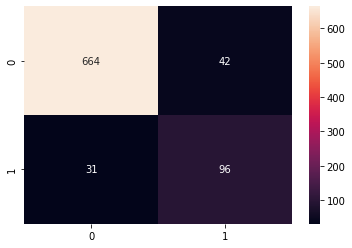

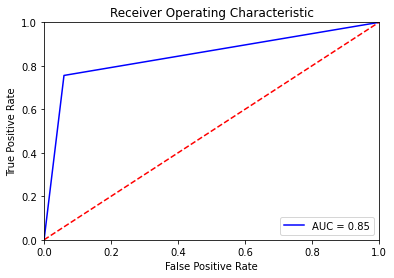

--------------------------------------------
Score:  [0.9004796163069544, 0.8991596638655462, 0.9099639855942377, 0.9123649459783914]
Mean Score:  0.9054920529362824


In [ ]:
scores = []
cv = KFold(n_splits=4, shuffle=False)
for i,(train_index, test_index) in enumerate(cv.split(X_scaled)):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_scaled[train_index], X_scaled[test_index], y[train_index], y[test_index]
    tree_model.fit(X_train, y_train)
    scores.append(tree_model.score(X_test, y_test))
    y_pred_dt = tree_model.predict(X_test)
    print(f"Fold: {i+1}",classification_report(y_test, y_pred_dt))
    print('confusion matrix', confusion_matrix(y_test, y_pred_dt))
    # Feature importance
    # importance = model.feature_importances_


    cf_matrix = confusion_matrix(y_test, y_pred_dt)
    sns.heatmap(cf_matrix, annot= True, fmt='g')
    plt.show()
    # print(confusion_matrix(y_test, y_pred))

    # ROC curve

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print("--------------------------------------------")
    
print('Score: ',scores)
print("Mean Score: ",np.mean(scores))

In [ ]:
# Feature impotance in decision tree
feature_score = []
importance = tree_model.feature_importances_
for v in importance:
  feature_score.append(v) 
# Plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

In [ ]:
feature_score 

[0.020356494054072295,
 0.013323886436597111,
 0.08566712499952048,
 0.014725921937719247,
 0.0366400067697772,
 0.10011146288727345,
 0.015724869916666367,
 0.14450313544983803,
 0.056398505018115414,
 0.022166645392256958,
 0.08451867598337456,
 0.023582897472967428,
 0.033424309555703344,
 0.04623199005390405,
 0.024749368244093396,
 0.08356741864512374,
 0.09114230793418707,
 0.10316497924880987]

In [ ]:
feature

['Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [ ]:
feature_imp_df = pd.DataFrame(feature_score, feature)

In [ ]:
feature_imp_df

,0
Account length,0.020356
Area code,0.013324
International plan,0.085667
Voice mail plan,0.014726
Number vmail messages,0.036640
Total day minutes,0.100111
Total day calls,0.015725
Total day charge,0.144503
Total eve minutes,0.056399
Total eve calls,0.022167


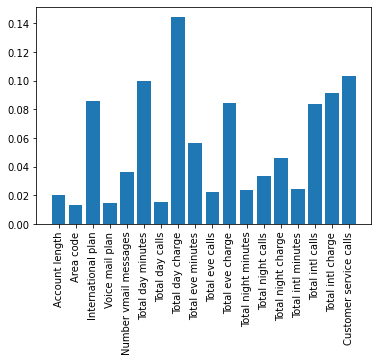

In [ ]:
plt.bar(feature,feature_score)
plt.xticks(rotation='vertical')

plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

Fold: 1               precision    recall  f1-score   support

           0       0.97      0.99      0.98       734
           1       0.87      0.76      0.81       100

    accuracy                           0.96       834
   macro avg       0.92      0.87      0.89       834
weighted avg       0.96      0.96      0.96       834

confusion matrix [[723  11]
 [ 24  76]]


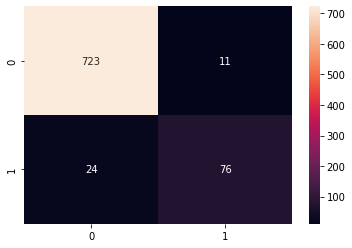

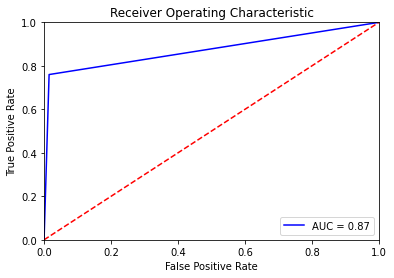

--------------------------------------------
Fold: 2               precision    recall  f1-score   support

           0       0.95      0.99      0.97       713
           1       0.90      0.71      0.79       120

    accuracy                           0.95       833
   macro avg       0.93      0.85      0.88       833
weighted avg       0.95      0.95      0.94       833

confusion matrix [[704   9]
 [ 35  85]]


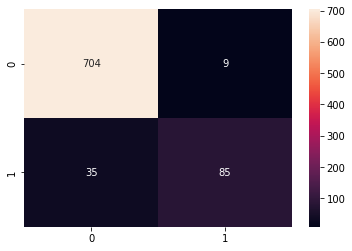

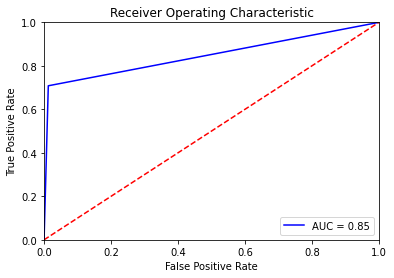

--------------------------------------------
Fold: 3               precision    recall  f1-score   support

           0       0.95      1.00      0.97       697
           1       0.97      0.72      0.83       136

    accuracy                           0.95       833
   macro avg       0.96      0.86      0.90       833
weighted avg       0.95      0.95      0.95       833

confusion matrix [[694   3]
 [ 38  98]]


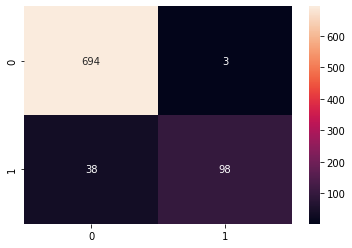

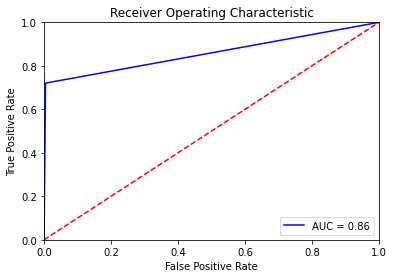

--------------------------------------------
Fold: 4               precision    recall  f1-score   support

           0       0.95      1.00      0.97       706
           1       0.98      0.72      0.83       127

    accuracy                           0.96       833
   macro avg       0.97      0.86      0.90       833
weighted avg       0.96      0.96      0.95       833

confusion matrix [[704   2]
 [ 35  92]]


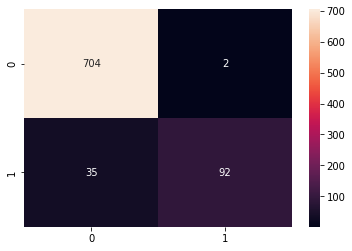

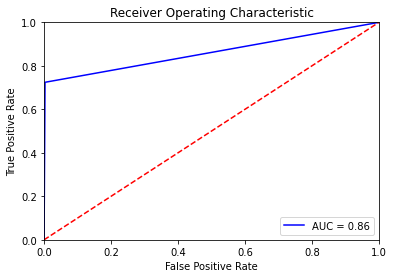

--------------------------------------------
Score:  [0.9004796163069544, 0.8991596638655462, 0.9099639855942377, 0.9123649459783914, 0.9580335731414868, 0.9471788715486195, 0.9507803121248499, 0.9555822328931572]
Mean Score:  0.9291929001816555


In [ ]:
for i,(train_index, test_index) in enumerate(cv.split(X_scaled)):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_scaled[train_index], X_scaled[test_index], y[train_index], y[test_index]
    rf_model.fit(X_train, y_train)
    scores.append(rf_model.score(X_test, y_test))
    y_pred = rf_model.predict(X_test)
    print(f"Fold: {i+1}",classification_report(y_test, y_pred))
    print('confusion matrix', confusion_matrix(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, fmt='g')
    plt.show()

    # ROC curve

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # print(confusion_matrix(y_test, y_pred))
    print("--------------------------------------------")
    
print('Score: ',scores)
print("Mean Score: ",np.mean(scores))

In [ ]:
# Feature impotance in Random forest
feature_score_rf = []
importance = rf_model.feature_importances_
for v in importance:
  feature_score_rf.append(v)

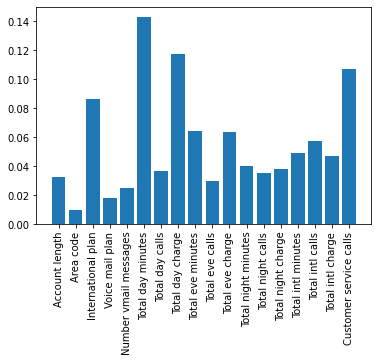

In [ ]:
plt.bar(feature,feature_score_rf)
plt.xticks(rotation='vertical')

plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc


In [ ]:
nav_model = GaussianNB()

Fold: 1               precision    recall  f1-score   support

           0       0.94      0.91      0.92       734
           1       0.44      0.55      0.49       100

    accuracy                           0.86       834
   macro avg       0.69      0.73      0.71       834
weighted avg       0.88      0.86      0.87       834

Confusion matrix [[665  69]
 [ 45  55]]


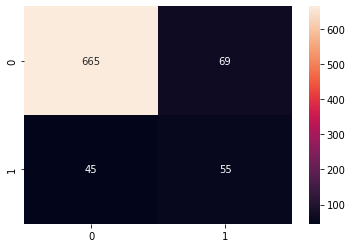

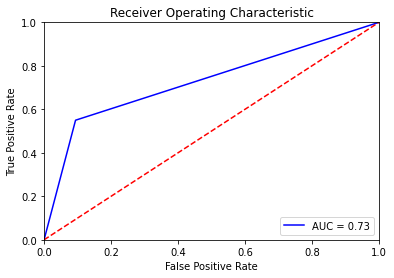

--------------------------------------------
Fold: 2               precision    recall  f1-score   support

           0       0.91      0.93      0.92       713
           1       0.54      0.47      0.50       120

    accuracy                           0.87       833
   macro avg       0.73      0.70      0.71       833
weighted avg       0.86      0.87      0.86       833

Confusion matrix [[665  48]
 [ 64  56]]


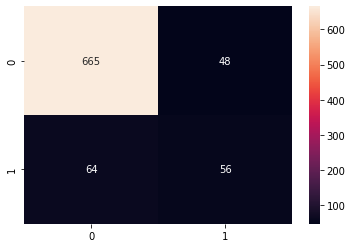

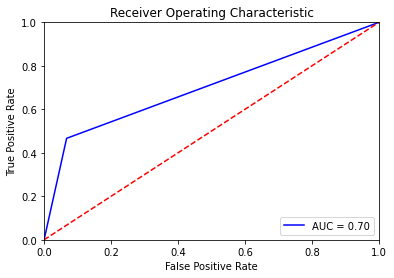

--------------------------------------------
Fold: 3               precision    recall  f1-score   support

           0       0.92      0.93      0.93       697
           1       0.63      0.59      0.61       136

    accuracy                           0.88       833
   macro avg       0.78      0.76      0.77       833
weighted avg       0.87      0.88      0.87       833

Confusion matrix [[650  47]
 [ 56  80]]


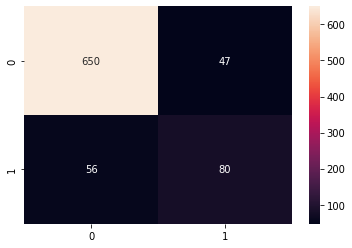

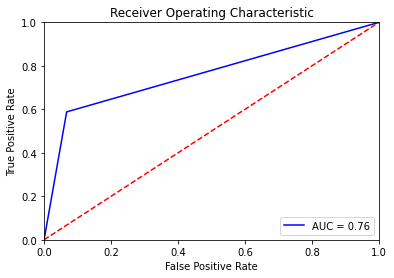

--------------------------------------------
Fold: 4               precision    recall  f1-score   support

           0       0.91      0.91      0.91       706
           1       0.52      0.53      0.53       127

    accuracy                           0.85       833
   macro avg       0.72      0.72      0.72       833
weighted avg       0.86      0.85      0.85       833

Confusion matrix [[645  61]
 [ 60  67]]


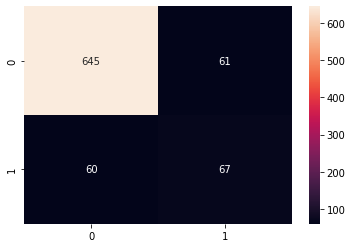

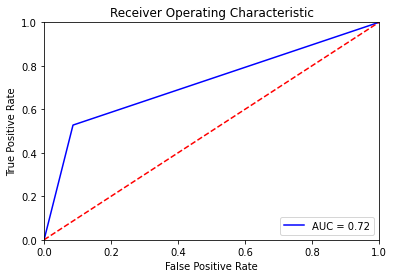

--------------------------------------------
Score:  [0.9004796163069544, 0.8991596638655462, 0.9099639855942377, 0.9123649459783914, 0.9580335731414868, 0.9471788715486195, 0.9507803121248499, 0.9555822328931572, 0.8633093525179856, 0.865546218487395, 0.8763505402160864, 0.8547418967587035]
Mean Score:  0.9077909341194511


In [ ]:
from sklearn import metrics
for i,(train_index, test_index) in enumerate(cv.split(X_scaled)):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_scaled[train_index], X_scaled[test_index], y[train_index], y[test_index]
    nav_model.fit(X_train, y_train)
    scores.append(nav_model.score(X_test, y_test))
    y_pred = nav_model.predict(X_test)
    print(f"Fold: {i+1}",classification_report(y_test, y_pred))
    print("Confusion matrix", confusion_matrix(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot = True, fmt='g')

    plt.show()
    # ROC curve

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # print('confusion matrix')
    
    print("--------------------------------------------")
    
print('Score: ',scores)
print("Mean Score: ",np.mean(scores))